Car Insurance Claims dataset provides annual car insurance data from an insurance company, aiming to analyze customer behavior and predict insurance claim outcomes. 
It captures various customer and vehicle characteristics (18 descriptive attributes) alongside an outcome variable (1 claim indicator) to understand factors influencing claims.

#### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Car_Insurance_Claim.csv')

# Define the target_attribute variable
target_attribute = 'OUTCOME'

# Display the first few rows
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Check the info of the data set which describes null values

ID                     0.00
AGE                    0.00
GENDER                 0.00
RACE                   0.00
DRIVING_EXPERIENCE     0.00
EDUCATION              0.00
INCOME                 0.00
CREDIT_SCORE           9.82
VEHICLE_OWNERSHIP      0.00
VEHICLE_YEAR           0.00
MARRIED                0.00
CHILDREN               0.00
POSTAL_CODE            0.00
ANNUAL_MILEAGE         9.57
VEHICLE_TYPE           0.00
SPEEDING_VIOLATIONS    0.00
DUIS                   0.00
PAST_ACCIDENTS         0.00
OUTCOME                0.00
dtype: float64


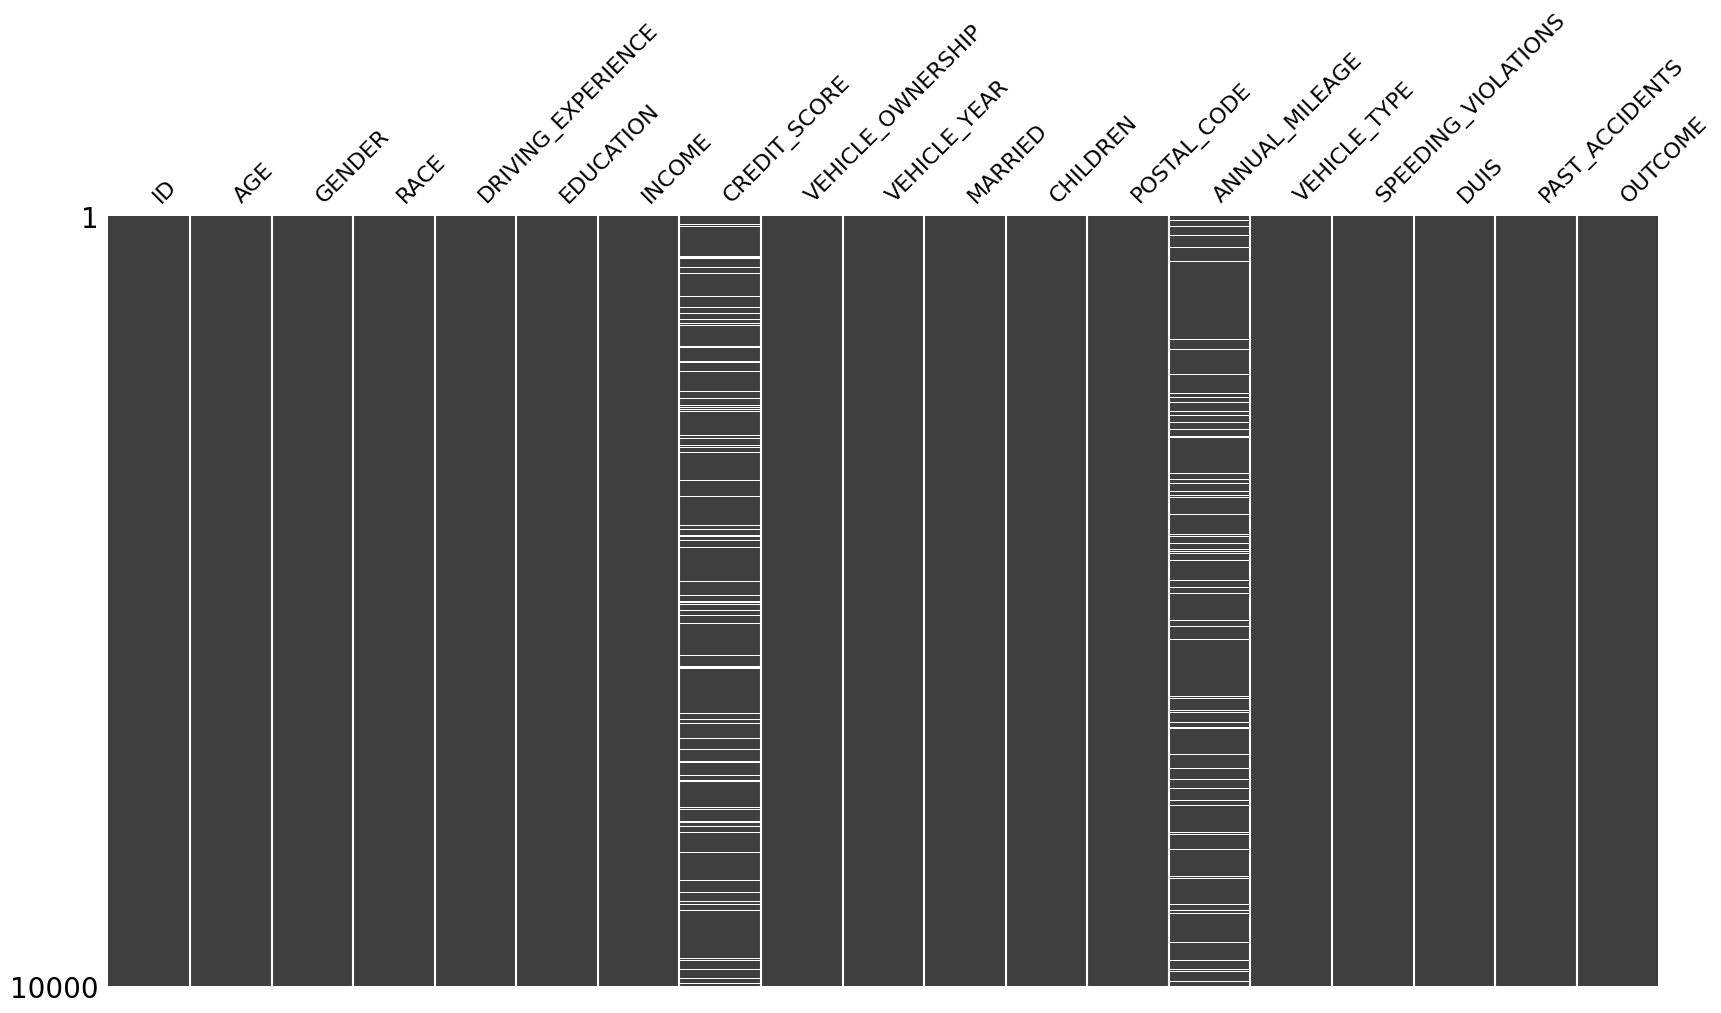

In [2]:
# Check for missing values
import missingno as msg
msg.matrix(df, figsize=(20, 10), sparkline=False)

# Print the percentage of missing values in each column
missing_percentage = df.isnull().mean()*100
print(missing_percentage)

Output the percentage of missing data in the columns where missing values are present, to make sure that their number is not large:

− CREDIT_SCORE: 9.82%;

− ANNUAL_MILEAGE: 9.57%.

OUTCOME
0.0    68.67
1.0    31.33
Name: proportion, dtype: float64


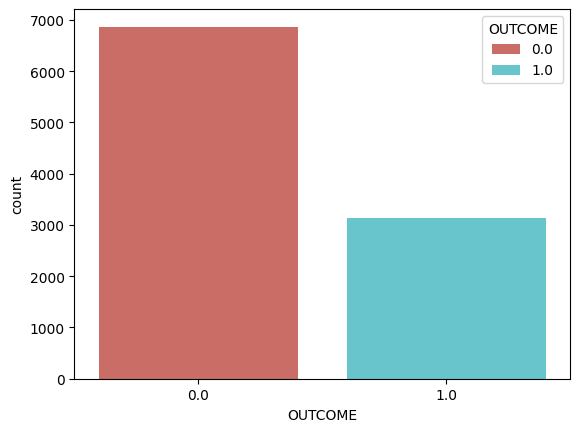

In [3]:
# Percentage of target_attribute variable classes
target_attribute_percentage = df[target_attribute].value_counts(normalize=True)*100
print(target_attribute_percentage)

sns.countplot(x=target_attribute, data=df, palette='hls', hue=target_attribute)
plt.show()

We have 31.33% persons who apply for a loan; And the 68.67% persons who did not apply for a loan, so our problem is somewhat imbalanced.

array([[<Axes: title={'center': 'CREDIT_SCORE'}>,
        <Axes: title={'center': 'VEHICLE_OWNERSHIP'}>,
        <Axes: title={'center': 'MARRIED'}>],
       [<Axes: title={'center': 'CHILDREN'}>,
        <Axes: title={'center': 'POSTAL_CODE'}>,
        <Axes: title={'center': 'ANNUAL_MILEAGE'}>],
       [<Axes: title={'center': 'SPEEDING_VIOLATIONS'}>,
        <Axes: title={'center': 'DUIS'}>,
        <Axes: title={'center': 'PAST_ACCIDENTS'}>]], dtype=object)

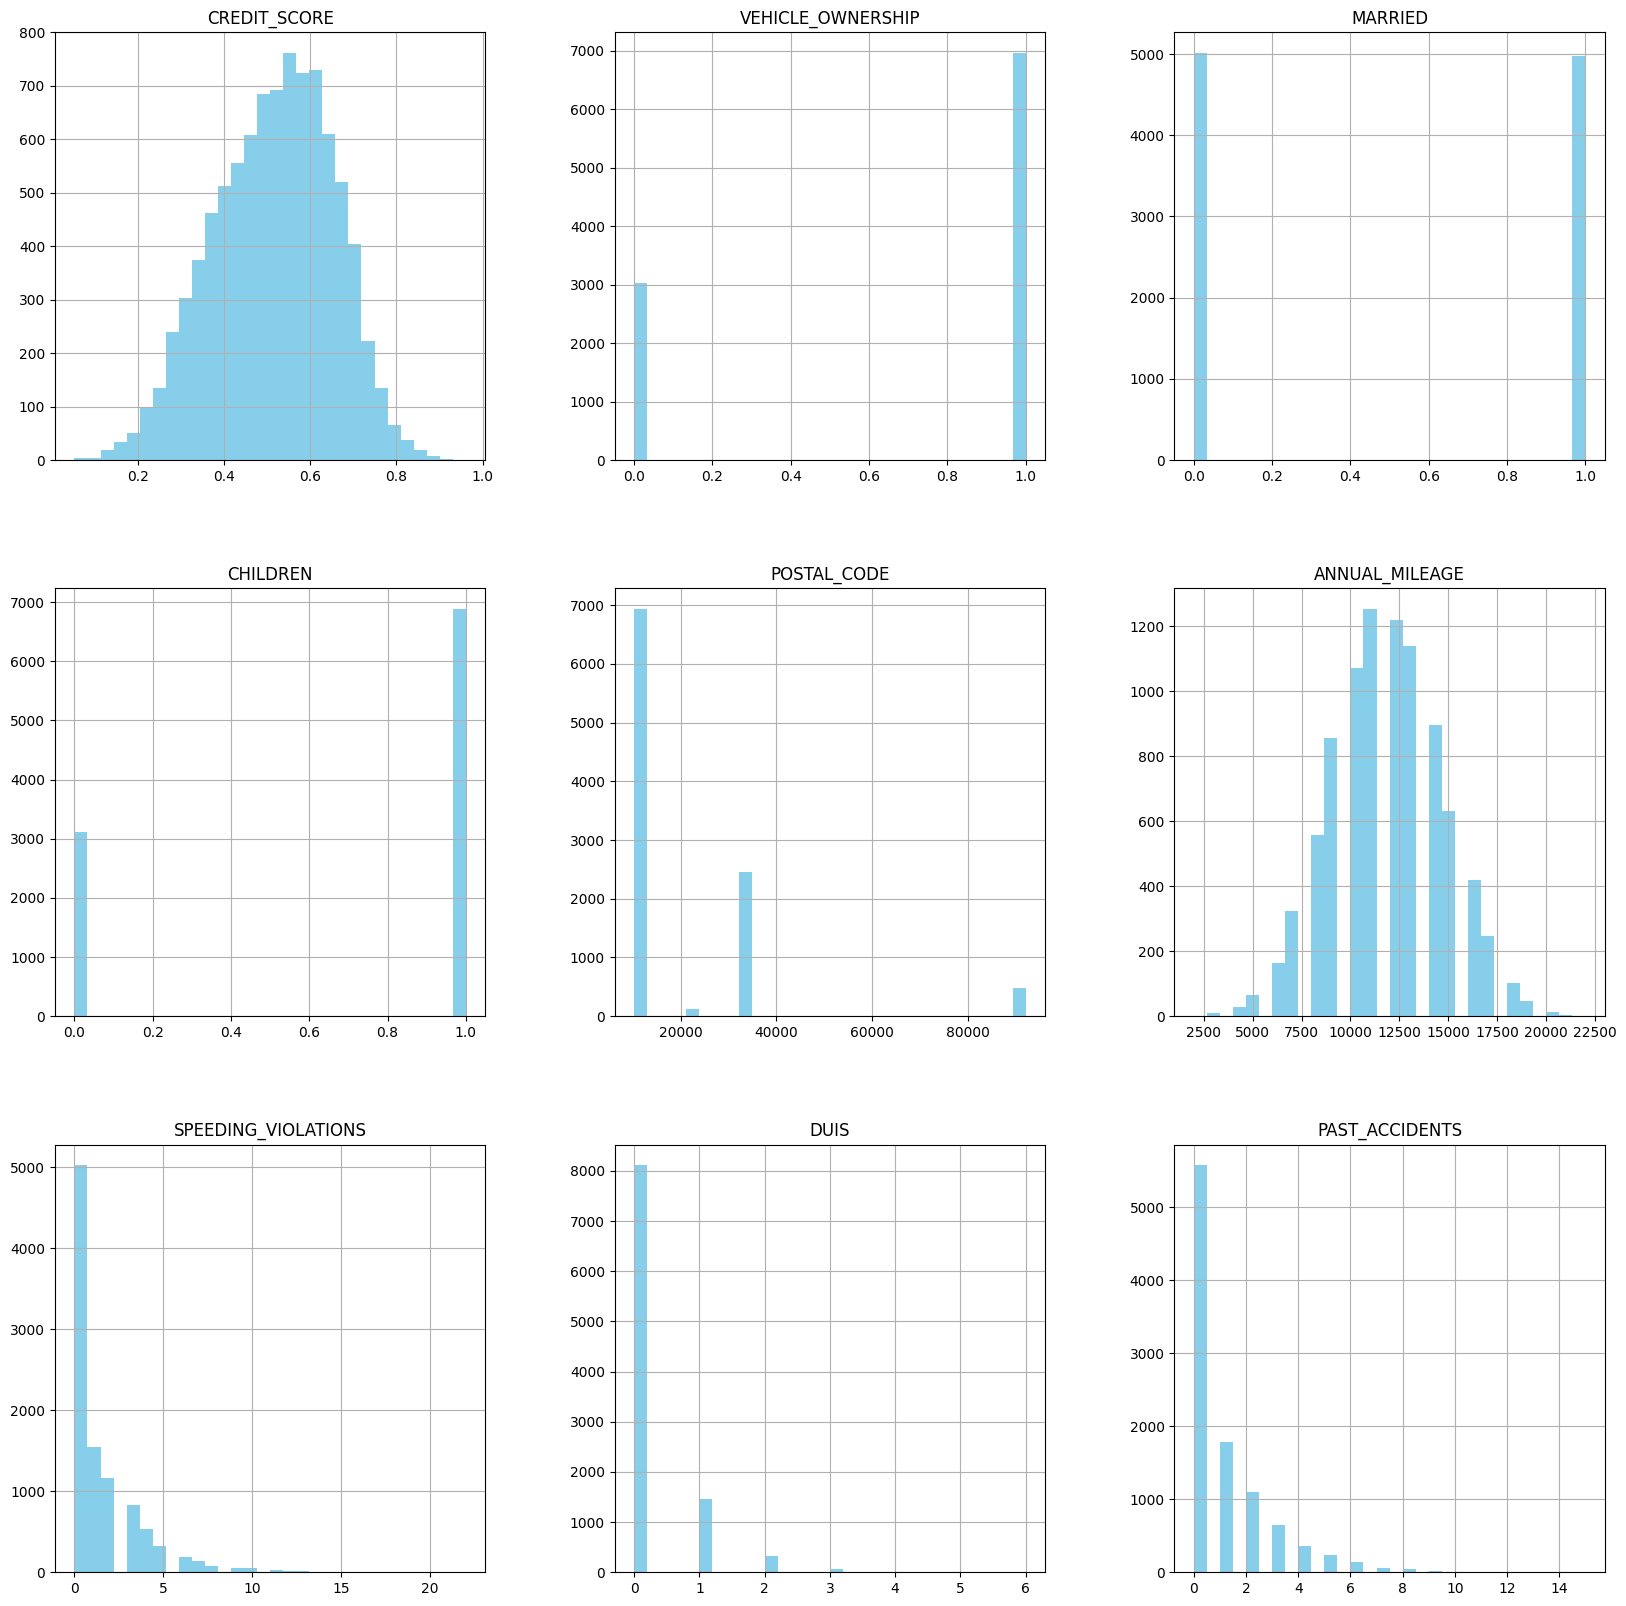

In [4]:
# Histogram of the dataset attributes (excluding the ID and target_attribute) 
df_hist = df.drop("ID", axis=1)
df_hist = df_hist.drop(target_attribute, axis=1)

df_hist.hist(bins=30, figsize=(20, 20), color='skyblue')


##### Relationship Between Features and Target

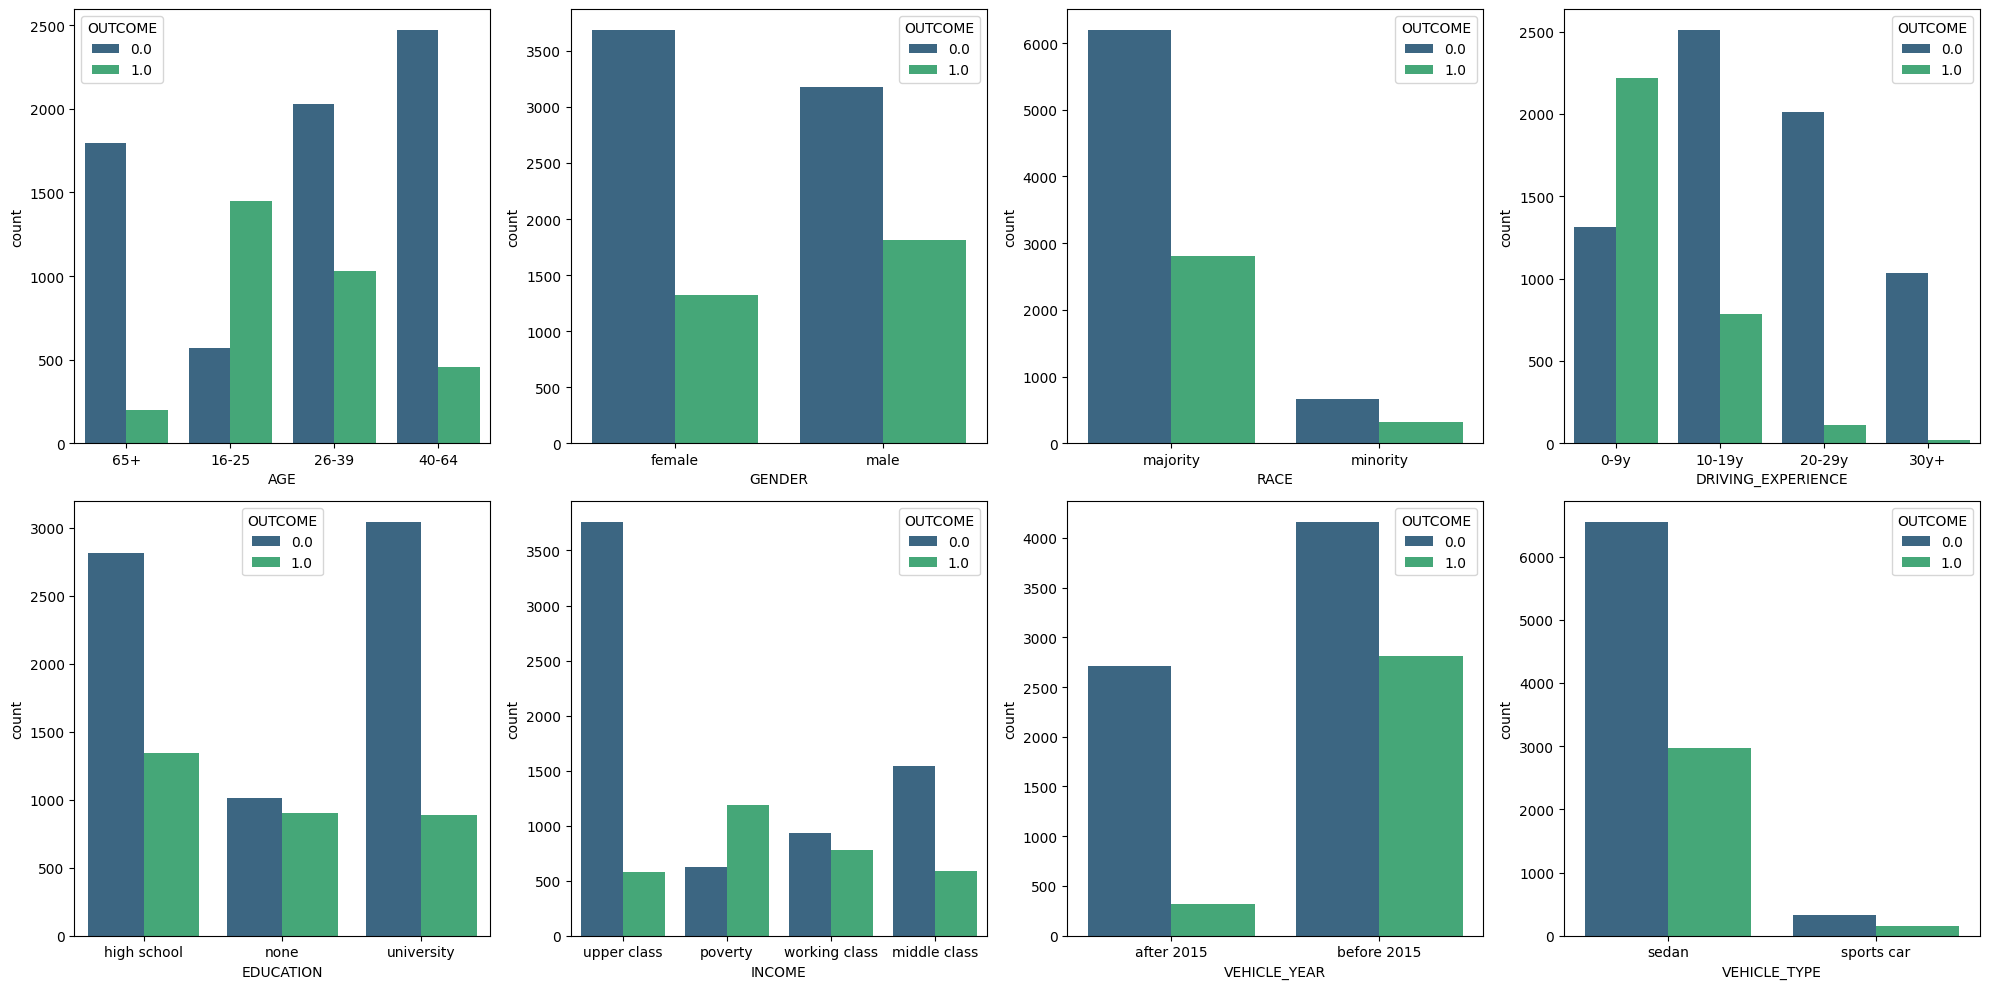

In [5]:
# Categorical Features

# Countplot for categorical features
cat_features = df.select_dtypes(include='object').columns

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the categorical features and plot countplots
for i, col in enumerate(cat_features):
  sns.countplot(x=col, hue=target_attribute, data=df, palette='viridis', ax=axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the merged plot
plt.show()


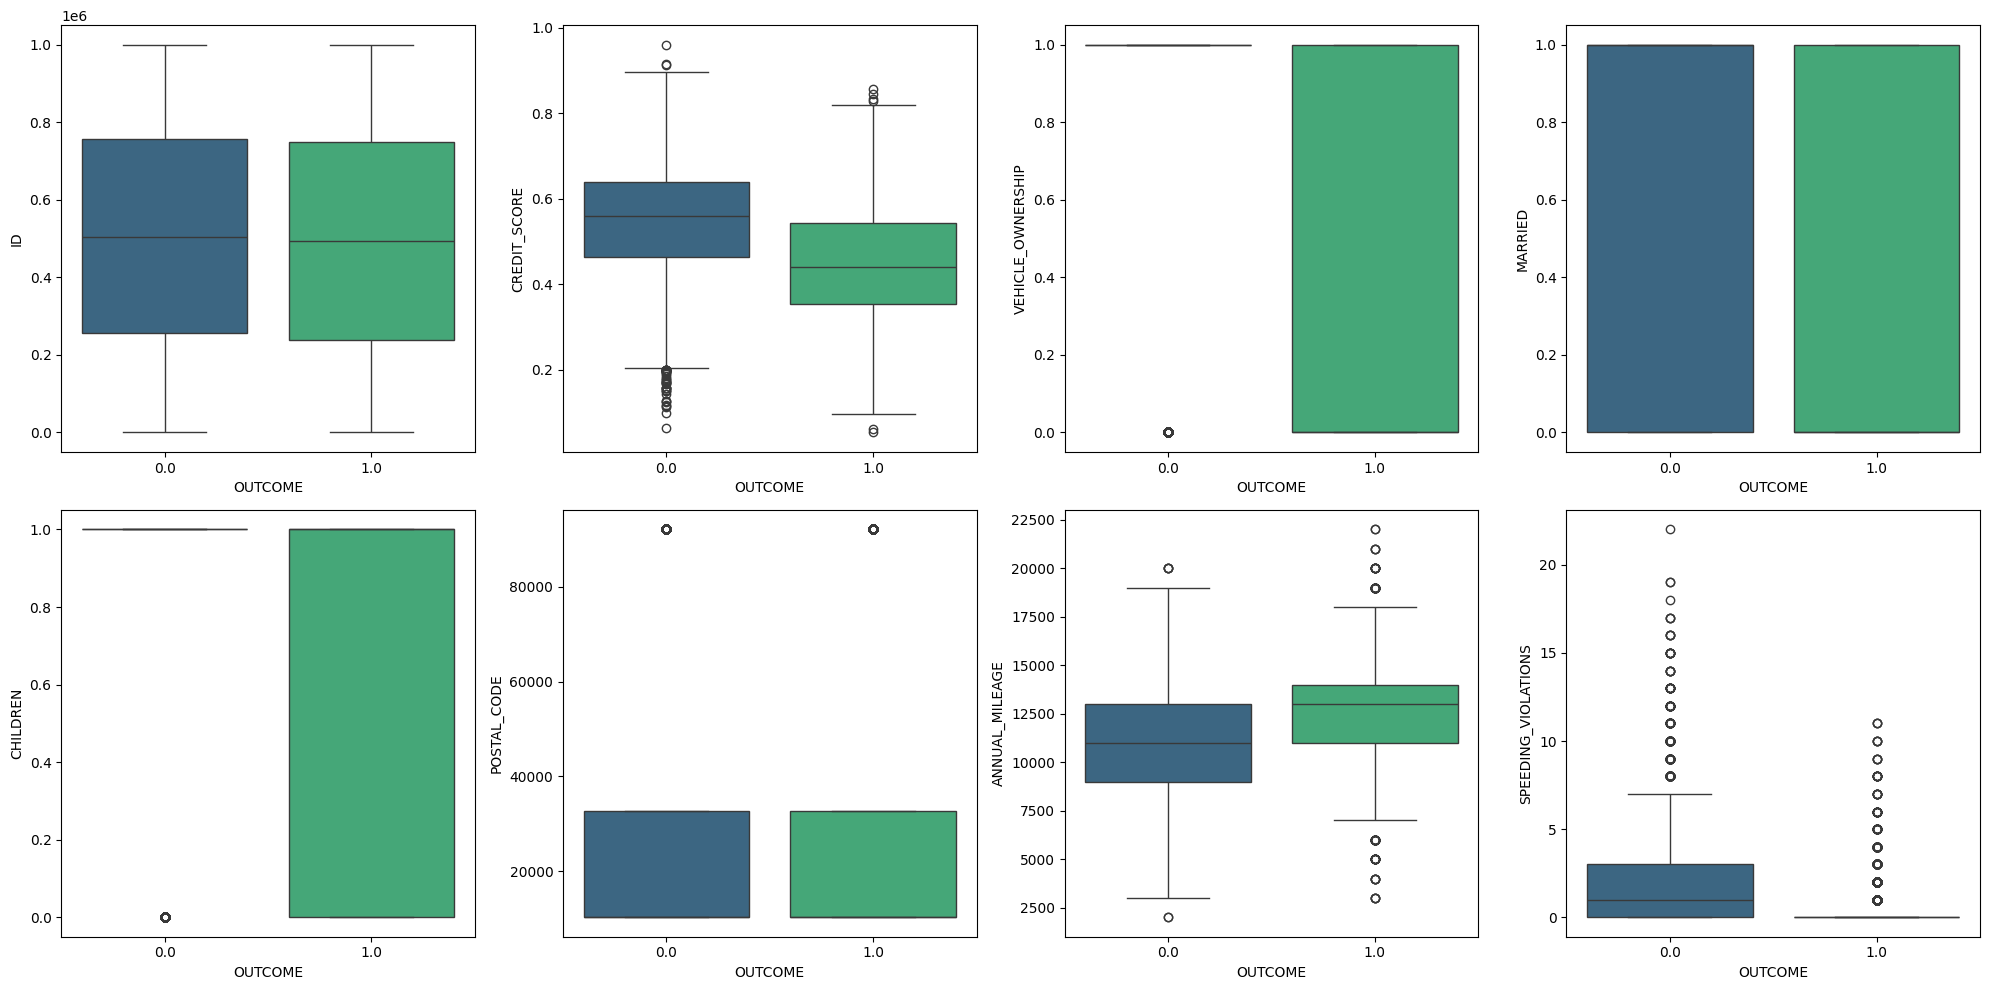

In [6]:
# Numerical Features

# Boxplots for numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the numerical features and plot boxplots
for i, col in enumerate(num_features[:len(axes)]):
  sns.boxplot(x=target_attribute, y=col, data=df, palette='viridis', ax=axes[i], legend=False, hue=target_attribute)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the merged plot
plt.show()


#### Data preprocessing

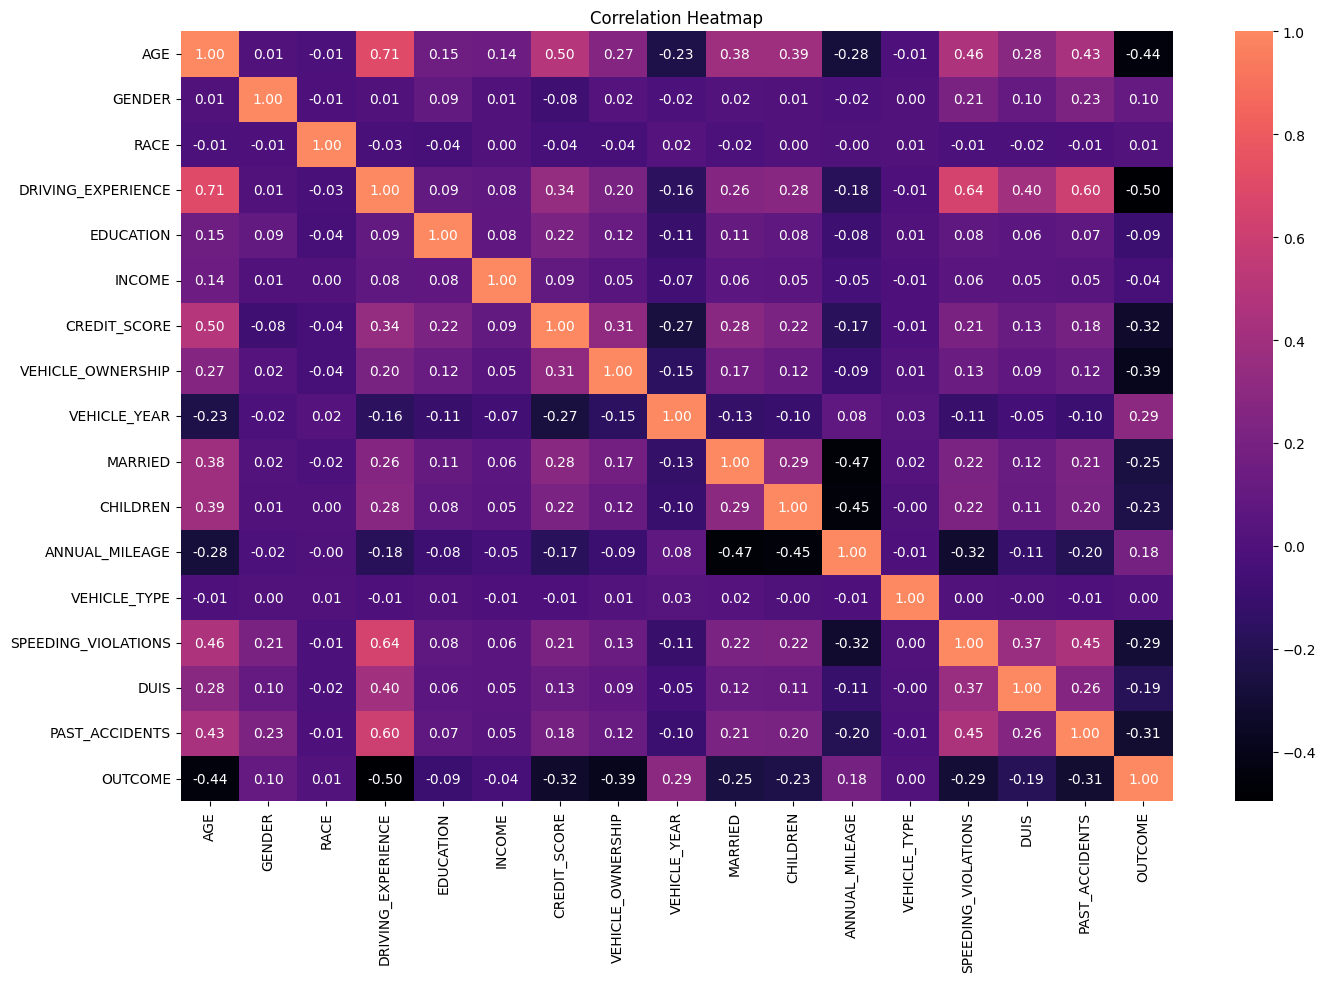

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# header: ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
# example1: 569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
# example2: 750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0

df_cleaned = df.copy()

# Drop the most useless columns
df_cleaned = df_cleaned.drop('ID', axis=1)
df_cleaned = df_cleaned.drop('POSTAL_CODE', axis=1)

# Drop the rows with missing values
df_cleaned = df_cleaned.dropna()

# Standardize the numerical columns
numerical_features = ['CREDIT_SCORE','ANNUAL_MILEAGE']

scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Encode categorical columns variables without using one-hot encoding

le = LabelEncoder()
df_cleaned['AGE'] = le.fit_transform(df_cleaned['AGE'])
df_cleaned['GENDER'] = le.fit_transform(df_cleaned['GENDER'])
df_cleaned['RACE'] = le.fit_transform(df_cleaned['RACE'])
df_cleaned['DRIVING_EXPERIENCE'] = le.fit_transform(df_cleaned['DRIVING_EXPERIENCE'])
df_cleaned['EDUCATION'] = le.fit_transform(df_cleaned['EDUCATION'])
df_cleaned['INCOME'] = le.fit_transform(df_cleaned['INCOME'])
df_cleaned['VEHICLE_YEAR'] = le.fit_transform(df_cleaned['VEHICLE_YEAR'])
df_cleaned['VEHICLE_TYPE'] = le.fit_transform(df_cleaned['VEHICLE_TYPE'])

plt.figure(figsize=(16, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='magma', fmt='.2f', center=0.5)
plt.title('Correlation Heatmap')
plt.show()

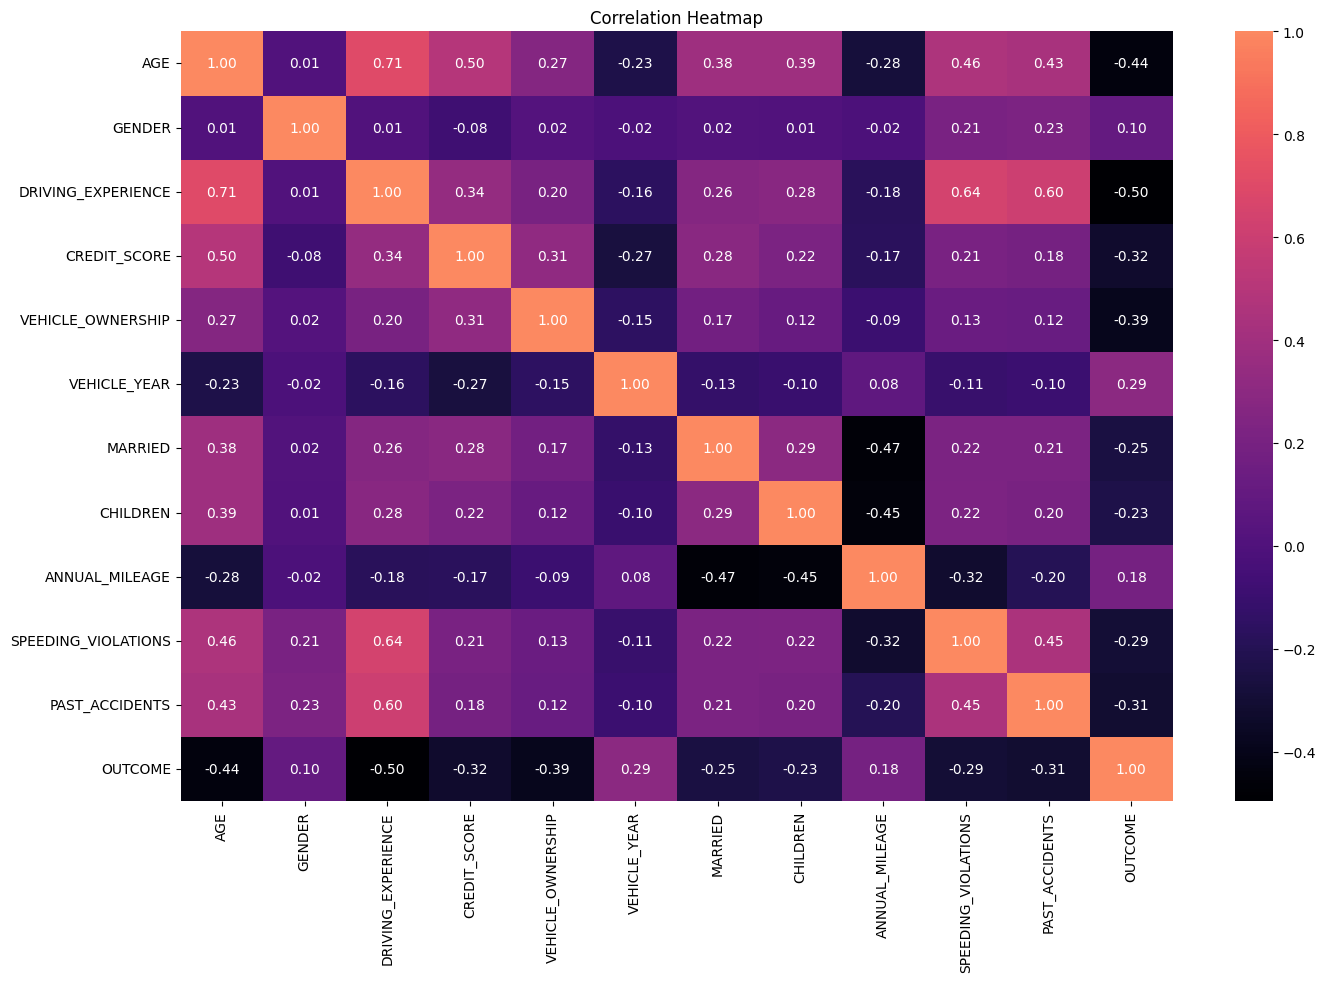

In [8]:
# Drop the columns without correlation
df_dropped = df_cleaned.copy()

df_dropped.drop(columns=['VEHICLE_TYPE', 'RACE', 'INCOME', 'EDUCATION', 'DUIS'], inplace=True)


plt.figure(figsize=(16, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='magma', fmt='.2f', center=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Split Data

The split process involves defining features and the target attribute, splitting the dataset into training and testing sets. Thus, 20% of the data would be allocated to the test set, while the remaining 80% forms the training set.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Define target_attribute and features
X = df_dropped.drop(columns=[target_attribute])
y = df_dropped[target_attribute]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)

# Print the shape of the training and testing datasets
print(X_train.shape)
print(X_test.shape)

(6519, 11)
(1630, 11)


## CBR

#### Similarity Assessment

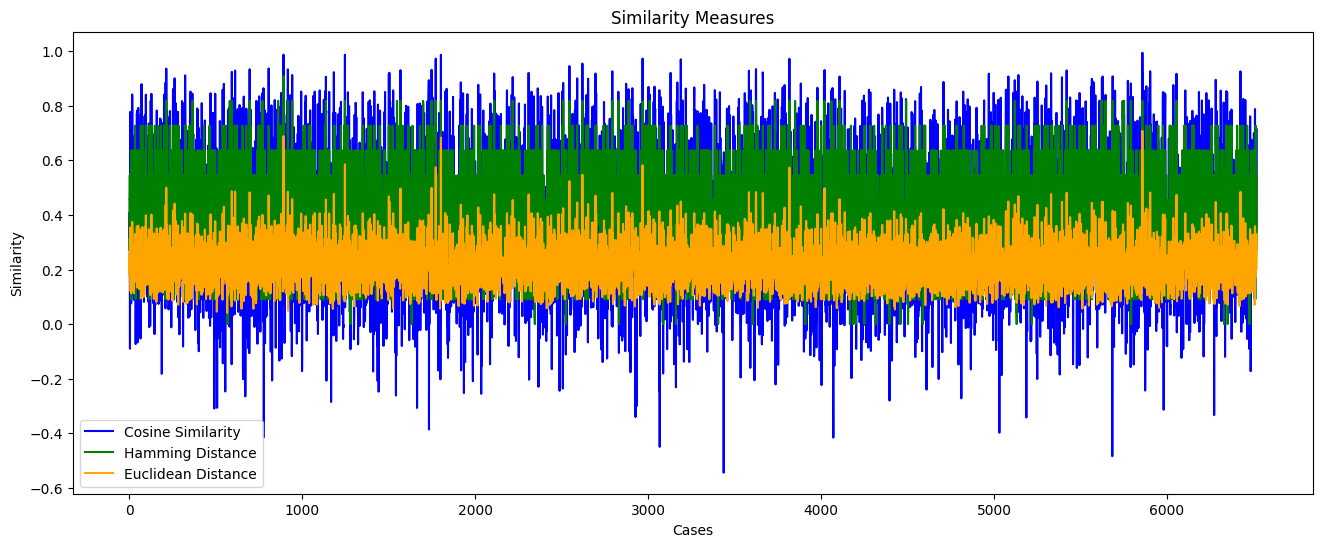

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate similarity between two cases using cosine similarity

def calculate_cosine_similarity(new_case, case_base):
    similarities = cosine_similarity([new_case.values], case_base)
    return similarities[0]

# Function to calculate similarity between two cases using euclidean distance

def calculate_euclidean_similarity(new_case, case_base):
    distances = np.linalg.norm(case_base - new_case, axis=1)
    similarities = 1 / (1 + distances)
    return similarities

# Function to calculate similarity between two cases using hamming distance

def calculate_hamming_similarity(new_case, case_base):
    similarities = np.sum(new_case == case_base, axis=1) / len(new_case)
    return similarities.values

# Example of a new case
test_case = X_test.iloc[5]

# Test all similarity functions
cosine_similarities = calculate_cosine_similarity(test_case, X_train) # 1.4
hamming_similarities = calculate_hamming_similarity(test_case, X_train) # 1.8
euclidean_similarities = calculate_euclidean_similarity(test_case, X_train) # 0.9

# Visualize the similarities for a sample case
plt.figure(figsize=(16, 6))
plt.plot(cosine_similarities, label='Cosine Similarity', color='blue')
plt.plot(hamming_similarities, label='Hamming Distance', color='green')
plt.plot(euclidean_similarities, label='Euclidean Distance', color='orange')
plt.xlabel('Cases')
plt.ylabel('Similarity')
plt.title('Similarity Measures')
plt.legend()
plt.show()


#### Case Retrieval

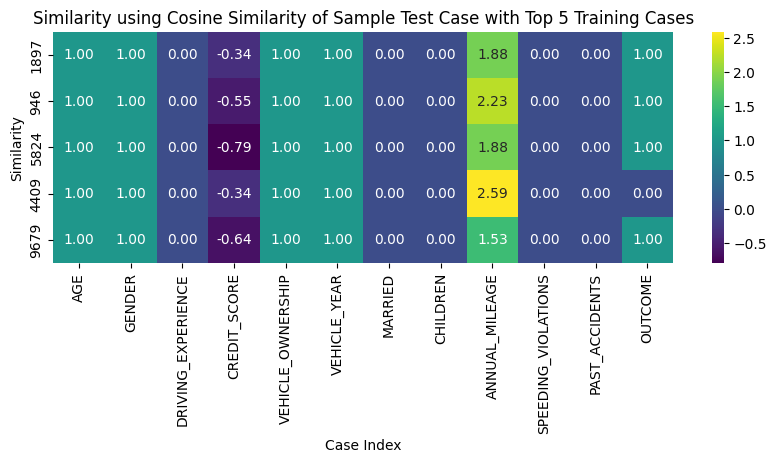

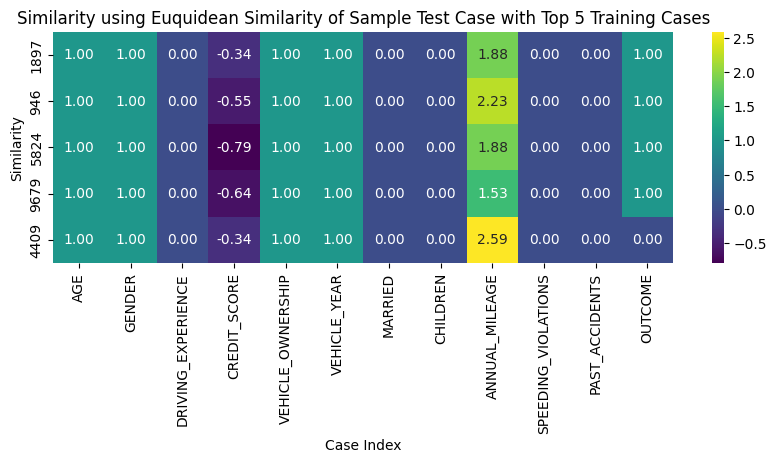

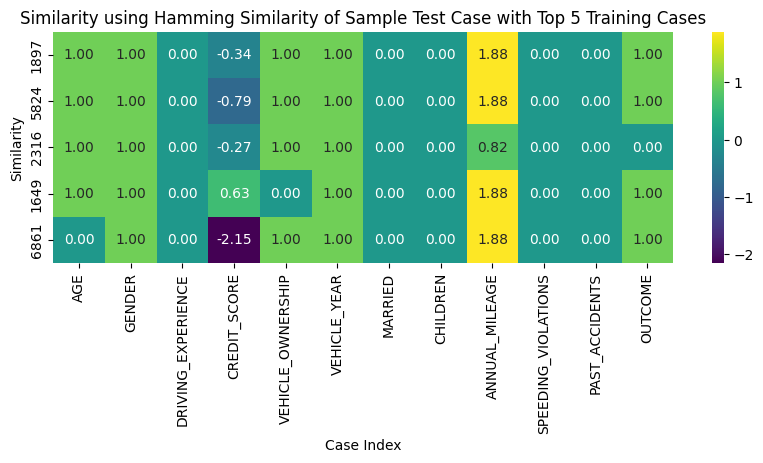

In [61]:
# Retrieve the top N most similar cases

def retrieve_similar_cases(new_case, case_base, n=5, similarity_func=calculate_cosine_similarity):
  similarities = similarity_func(new_case, case_base.drop(columns=[target_attribute]))
  similar_cases_indices = similarities.argsort()[-n:][::-1]
  return case_base.iloc[similar_cases_indices], similarities[similar_cases_indices]

# Retrieve top 3 similar cases with a different similarity function
n_value = 5

# Display the top N similar cases using cosine similarity
cosine_similar_cases, cosine_similarities = retrieve_similar_cases(test_case, df_dropped, n=n_value, similarity_func=calculate_cosine_similarity)
plt.figure(figsize=(10, 3))
sns.heatmap(cosine_similar_cases, annot=True, cmap='viridis', fmt='.2f')
plt.xlabel('Case Index')
plt.ylabel('Similarity')
plt.title(f'Similarity using Cosine Similarity of Sample Test Case with Top 5 Training Cases')

# Display the top N similar cases using euclidean similarity
euclidean_similar_cases, euclidean_similarities = retrieve_similar_cases(test_case, df_dropped, n=n_value, similarity_func=calculate_euclidean_similarity)
plt.figure(figsize=(10, 3))
sns.heatmap(euclidean_similar_cases, annot=True, cmap='viridis', fmt='.2f')
plt.xlabel('Case Index')
plt.ylabel('Similarity')
plt.title(f'Similarity using Euquidean Similarity of Sample Test Case with Top 5 Training Cases')

# Display the top N similar cases using hamming similarity
hamming_similar_cases, hamming_similarities = retrieve_similar_cases(test_case, df_dropped, n=n_value, similarity_func=calculate_hamming_similarity)
plt.figure(figsize=(10, 3))
sns.heatmap(hamming_similar_cases, annot=True, cmap='viridis', fmt='.2f')
plt.xlabel('Case Index')
plt.ylabel('Similarity')
plt.title(f'Similarity using Hamming Similarity of Sample Test Case with Top 5 Training Cases')

plt.show()

#### Case Reusing

In [66]:
# Implement the Reuse function with Majority rule
def reuse_majority(similar_cases, target_attribute):
    majority_decision = similar_cases[target_attribute].mode()[0]
    return majority_decision

# Test the Reuse function
reuse_prediction = reuse_majority(cosine_similar_cases, target_attribute)

print(f'Reuse Majority Result: {reuse_prediction}')

Reuse Majority Result: 1.0


#### Case Adaptation

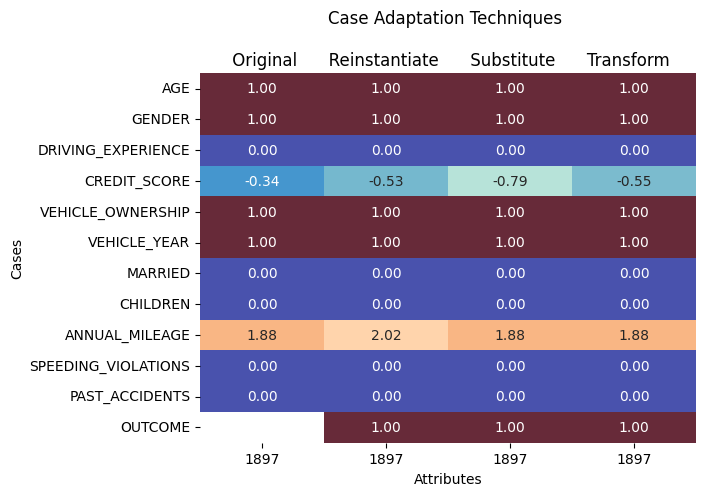

In [73]:
# Implement Reinstantiate function

def reinstantiate(new_case, similar_cases, prediction):
    new_case_copy = new_case.copy()
    for col in new_case_copy.index:
        new_case_copy[col] = similar_cases[col].mean()
    new_case_copy[target_attribute] = prediction
    return new_case_copy

# Reinstantiate the new case
reinstantiated_case = reinstantiate(test_case, cosine_similar_cases, reuse_prediction)

# Implement the Substitution function

def substitute(new_case, similar_cases, prediction):
    new_case_copy = new_case.copy()
    for col in new_case_copy.index:
        new_case_copy[col] = similar_cases[col].mode().values[0]
    new_case_copy[target_attribute] = prediction
    return new_case_copy

# Substitute the new case
substituted_case = substitute(test_case, cosine_similar_cases, reuse_prediction)

# Implement the Transformation function

def transform(new_case, similar_cases, prediction):
    new_case_copy = new_case.copy()
    for col in new_case_copy.index:
        new_case_copy[col] = similar_cases[col].median()
    new_case_copy[target_attribute] = prediction
    return new_case_copy

# Transform the new case
transformed_case = transform(test_case, cosine_similar_cases, reuse_prediction)

# Visualize the new cases

sns.heatmap(pd.concat([test_case, reinstantiated_case, substituted_case, transformed_case], axis=1), annot=True, fmt='.2f', center=0.6, cbar=False)  # Changed color palette to 'coolwarm'
plt.xlabel('Attributes')
plt.ylabel('Cases')
plt.title('Case Adaptation Techniques \n\n Original      Reinstantiate      Substitute      Transform')
plt.show()


#### Case Learning

CBR systems thrive on continuous learning, constantly evolving as they encounter new data. This isn't a one-time data dump; it's an ongoing process fueled by fresh information on insurance claims.

In [14]:
# Test the update_case_base function
test_case_base = pd.concat([X_train, y_train], axis=1).iloc[:5]

# insert the new case into the case base
def update_case_base(new_case, case_base):
    new_case = pd.DataFrame(new_case).T
    case_base = pd.concat([case_base, new_case], axis=0)
    return case_base

updated_case_base = update_case_base(reinstantiated_case, test_case_base)

updated_case_base

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,OUTCOME
8818,1.0,0.0,1.0,0.167595,0.0,0.0,0.0,1.0,0.462955,0.0,1.0,0.0
8405,2.0,1.0,2.0,0.061641,1.0,1.0,0.0,0.0,0.108618,2.0,3.0,0.0
6306,1.0,1.0,1.0,-1.149031,1.0,0.0,0.0,0.0,0.817291,3.0,2.0,0.0
7380,0.0,0.0,0.0,0.360504,1.0,1.0,0.0,1.0,-0.245718,0.0,0.0,1.0
1718,0.0,0.0,0.0,-1.202892,1.0,1.0,1.0,1.0,-1.663063,0.0,0.0,0.0
1897,1.0,1.0,0.0,-0.532406,1.0,1.0,0.0,0.0,2.022034,0.0,0.0,1.0


#### Evaluation

In [76]:
# Implement the CBR Cycle
def cbr_cycle(new_case, case_base, n_value, similarity_func, reuse_func, adapt_func):
    # Retrieve similar cases
    similar_cases, _ = retrieve_similar_cases(new_case, case_base, n=n_value, similarity_func=similarity_func)
    # Reuse the similar cases
    prediction = reuse_func(similar_cases, target_attribute)
    # Adapt the new case
    adapted_case = adapt_func(new_case, similar_cases, prediction)
    # Update the case base
    updated_case_base = update_case_base(adapted_case, case_base)

    return prediction, updated_case_base


In [77]:
# Define the evaluation function
def evaluate_cbr(X_train, X_test, y_train, y_test, similarity_func, reuse_func, adaptation_func, n_value):
    y_pred = []

    case_base = pd.concat([X_train, y_train], axis=1)

    for _, test_case in X_test.iterrows():

        # Perform the CBR cycle
        prediction, case_base = cbr_cycle(test_case, case_base, n_value, similarity_func, reuse_func, adaptation_func)
        
        # Append the prediction to the list
        y_pred.append(prediction)

    return y_pred


### KNN

Consider how the system performs with different numbers of neighbors and since the most commonly studied search method is certainly k-nearest neighbors (k-NN) with cosine similarity metric compare their metrics such as accuracy, precision, recall, F1 score.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

def evaluate_knn(X_train, X_test, y_train, y_test, n_value, metric='cosine'):
    knn = KNeighborsClassifier(n_neighbors=n_value, metric=metric)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

In [79]:
def plot_report_n_values(n_values, accuracy_values, precision_values, recall_values, f1_values, system_name):
  # Create a plot of accuracy vs. N
  plt.figure(figsize=(14, 8))

  # Display numeric values on the plot
  for i, txt in enumerate(accuracy_values):
      plt.annotate(f'{txt:.4f}', (n_values[i], accuracy_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

  for i, txt in enumerate(precision_values):
      plt.annotate(f'{txt:.4f}', (n_values[i], precision_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

  for i, txt in enumerate(recall_values):
      plt.annotate(f'{txt:.4f}', (n_values[i], recall_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

  for i, txt in enumerate(f1_values):
      plt.annotate(f'{txt:.4f}', (n_values[i], f1_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

  plt.plot(n_values, accuracy_values, marker='o', color='black', label='Accuracy')
  plt.plot(n_values, precision_values, marker='o', color='red', label='Precision')
  plt.plot(n_values, recall_values, marker='o', color='green', label='Recall')
  plt.plot(n_values, f1_values, marker='o', color='blue', label='F1-Score')
  plt.xlabel('Number of Neighbors (N)')
  plt.ylabel('Metric Value')
  plt.title(f'Performance Metrics of the {system_name} for Different Values of N')
  plt.grid(True)
  plt.legend()
  plt.show()


In [80]:
# Test knn classifier with different values of N
n_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

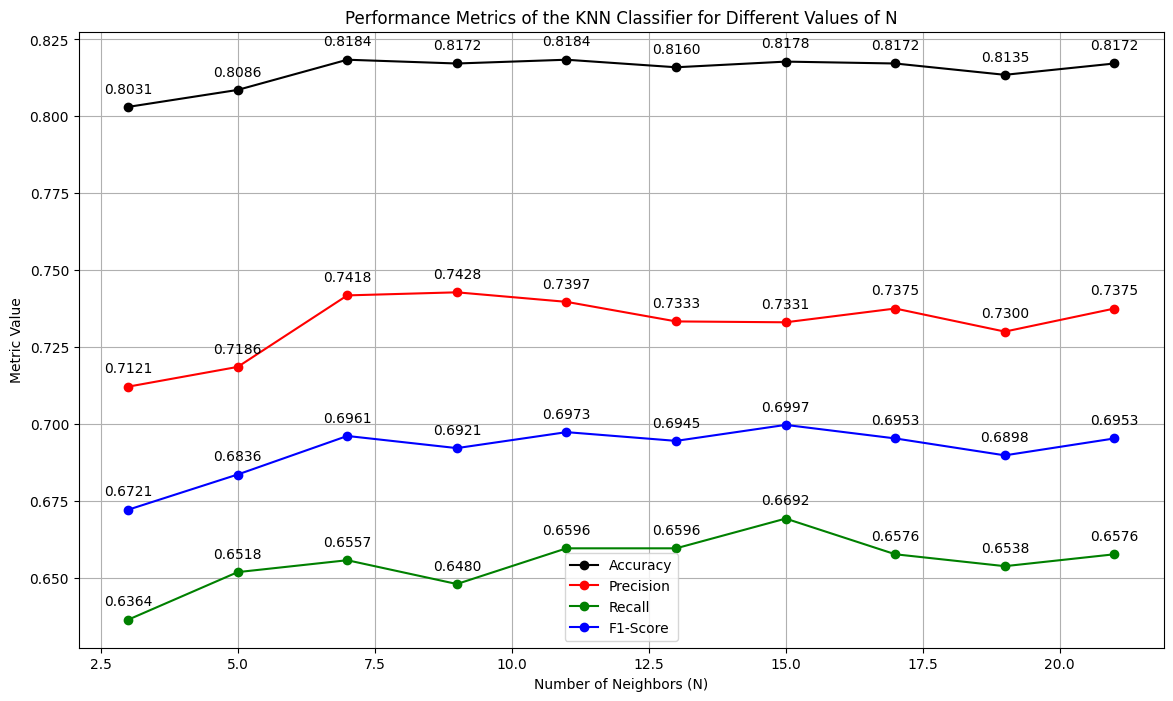

In [81]:
# Initialize a list to store the metric values
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for n in n_values:
    y_pred = evaluate_knn(X_train, X_test, y_train, y_test, n, metric='cosine')
    accuracy_values.append(accuracy_score(y_test, y_pred))
    precision_values.append(precision_score(y_test, y_pred))
    recall_values.append(recall_score(y_test, y_pred))
    f1_values.append(f1_score(y_test, y_pred))

# Plot the performance metrics
plot_report_n_values(n_values, accuracy_values, precision_values, recall_values, f1_values, 'KNN Classifier')

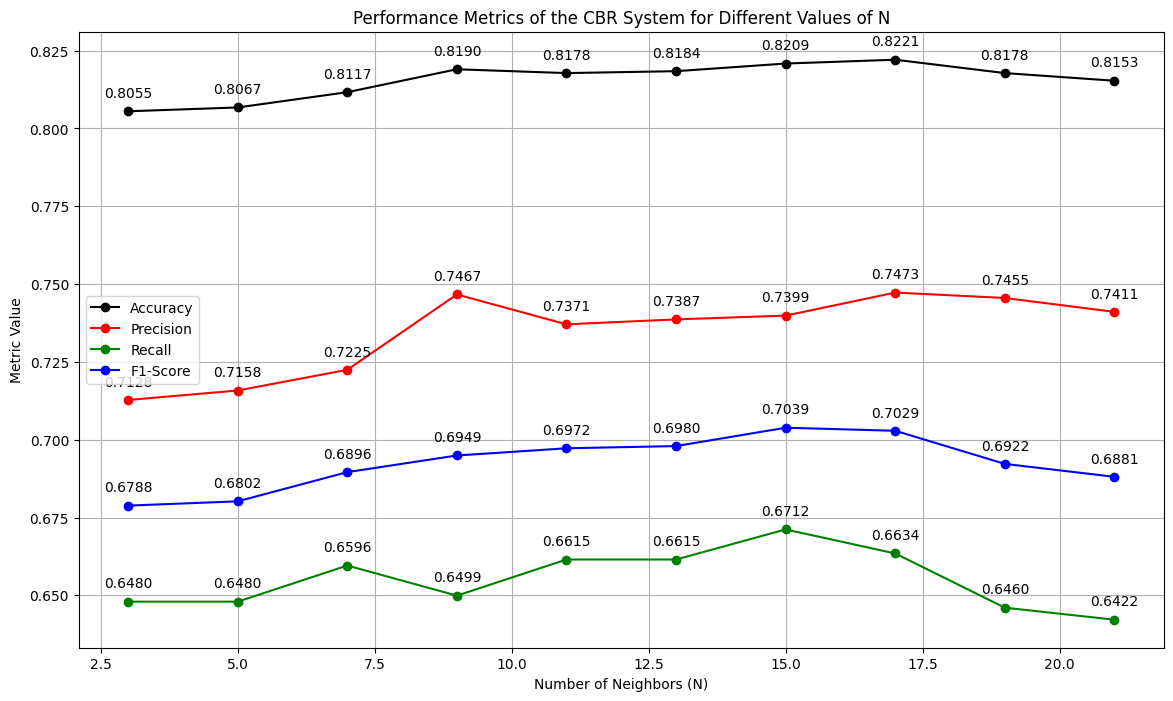

In [82]:
# Initialize a list to store the metric values
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for n in n_values:
    y_pred = evaluate_cbr(X_train, X_test, y_train, y_test, calculate_cosine_similarity, reuse_majority, reinstantiate, n)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    precision_values.append(precision_score(y_test, y_pred))
    recall_values.append(recall_score(y_test, y_pred))
    f1_values.append(f1_score(y_test, y_pred))

# Plot the performance metrics
plot_report_n_values(n_values, accuracy_values, precision_values, recall_values, f1_values, 'CBR System')

Depending on the specific application requirements (e.g., whether precision or recall is more critical), one might choose a slightly different N. However, N = 15 appears to be a robust choice for overall performance.

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1113
         1.0       0.73      0.67      0.70       517

    accuracy                           0.82      1630
   macro avg       0.79      0.78      0.78      1630
weighted avg       0.81      0.82      0.82      1630



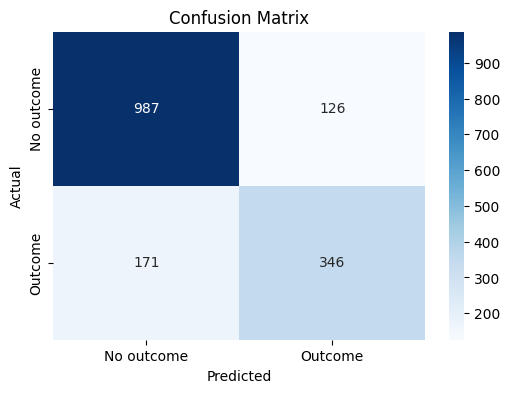

In [85]:
# Evaluate the KNN classifier with the best N value

# Define the best N value
best_n = 15

# Evaluate the KNN classifier with the best N value
y_pred = evaluate_knn(X_train, X_test, y_train, y_test, best_n, metric='cosine')

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No outcome', 'Outcome'], 
            yticklabels=['No outcome', 'Outcome'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1113
         1.0       0.74      0.67      0.70       517

    accuracy                           0.82      1630
   macro avg       0.80      0.78      0.79      1630
weighted avg       0.82      0.82      0.82      1630



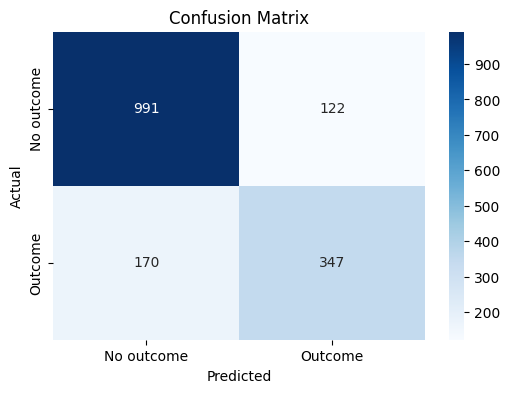

In [86]:
# Evaluate the CBR with the best N value
y_pred = evaluate_cbr(X_train, X_test, y_train, y_test, calculate_cosine_similarity, reuse_majority, reinstantiate, best_n)

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No outcome', 'Outcome'], 
            yticklabels=['No outcome', 'Outcome'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [95]:
def plot_report_of_functions(functions_results_df):
  # Plot the performance metrics
  plt.figure(figsize=(8, 8))

  # Display numeric values on the plot
  for i, txt in enumerate(functions_results_df['Accuracy']):
      plt.annotate(f'{txt:.4f}', (i, functions_results_df['Accuracy'][i]), textcoords="offset points", xytext=(0,5), ha='center')

  for i, txt in enumerate(functions_results_df['Precision']):
      plt.annotate(f'{txt:.4f}', (i, functions_results_df['Precision'][i]), textcoords="offset points", xytext=(0,10), ha='center')

  for i, txt in enumerate(functions_results_df['Recall']):
      plt.annotate(f'{txt:.4f}', (i, functions_results_df['Recall'][i]), textcoords="offset points", xytext=(0,-15), ha='center')

  for i, txt in enumerate(functions_results_df['F1 Score']):
      plt.annotate(f'{txt:.4f}', (i, functions_results_df['F1 Score'][i]), textcoords="offset points", xytext=(0,0), ha='center')

  sns.barplot(x=functions_results_df.iloc[:, 0], y=functions_results_df['Accuracy'], color='blue', label='Accuracy', alpha=0.7)
  sns.barplot(x=functions_results_df.iloc[:, 0], y=functions_results_df['Precision'], color='red', label='Precision', alpha=0.7)
  sns.barplot(x=functions_results_df.iloc[:, 0], y=functions_results_df['F1 Score'], color='orange', label='F1 Score', alpha=0.7)
  sns.barplot(x=functions_results_df.iloc[:, 0], y=functions_results_df['Recall'], color='green', label='Recall', alpha=0.7)

  ax = plt.gca()
  ax.set_ylim([0.6, 0.9])
  plt.ylabel('Metric Value')
  plt.title('Performance Metrics of the CBR System for Different {}'.format(functions_results_df.iloc[:, 0].name))
  plt.legend()
  plt.show()

In [92]:
# Evaluate the CBR with the best N value using different functions

similarity_functions = [calculate_cosine_similarity, calculate_euclidean_similarity, calculate_hamming_similarity]

# Initialize a list to store the metric values
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for s_f in similarity_functions:
    y_pred = evaluate_cbr(X_train, X_test, y_train, y_test, s_f, reuse_majority, reinstantiate, best_n)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    precision_values.append(precision_score(y_test, y_pred))
    recall_values.append(recall_score(y_test, y_pred))
    f1_values.append(f1_score(y_test, y_pred))


In [93]:
similarity_function_report = pd.DataFrame()
similarity_function_report['Similarity Function'] = ['Cosine Similarity', 'Euclidean Similarity', 'Hamming Similarity']
similarity_function_report['Accuracy'] = accuracy_values
similarity_function_report['Precision'] = precision_values
similarity_function_report['Recall'] = recall_values
similarity_function_report['F1 Score'] = f1_values

similarity_function_report

,Similarity Function,Accuracy,Precision,Recall,F1 Score
0,Cosine Similarity,0.820859,0.739872,0.671180,0.703854
1,Euclidean Similarity,0.816564,0.737991,0.653772,0.693333
2,Hamming Similarity,0.826994,0.734531,0.711799,0.722986


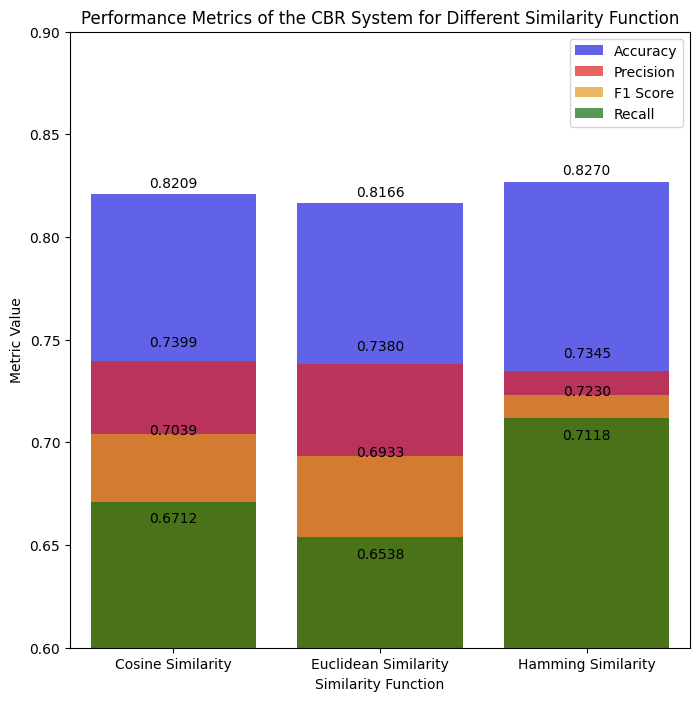

In [96]:
plot_report_of_functions(similarity_function_report)

In [97]:
adaptation_functions = [reinstantiate, substitute, transform]

# Initialize a list to store the metric values
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for a_f in adaptation_functions:
    y_pred = evaluate_cbr(X_train, X_test, y_train, y_test, calculate_hamming_similarity, reuse_majority, a_f, best_n)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    precision_values.append(precision_score(y_test, y_pred))
    recall_values.append(recall_score(y_test, y_pred))
    f1_values.append(f1_score(y_test, y_pred))

In [98]:
adaptation_function_report = pd.DataFrame()
adaptation_function_report['Adaptation Function'] = ['Reinstantiate', 'Substitute', 'Transform']
adaptation_function_report['Accuracy'] = accuracy_values
adaptation_function_report['Precision'] = precision_values
adaptation_function_report['Recall'] = recall_values
adaptation_function_report['F1 Score'] = f1_values

adaptation_function_report

,Adaptation Function,Accuracy,Precision,Recall,F1 Score
0,Reinstantiate,0.826994,0.734531,0.711799,0.722986
1,Substitute,0.821472,0.737395,0.678917,0.706949
2,Transform,0.820859,0.733888,0.682785,0.707415


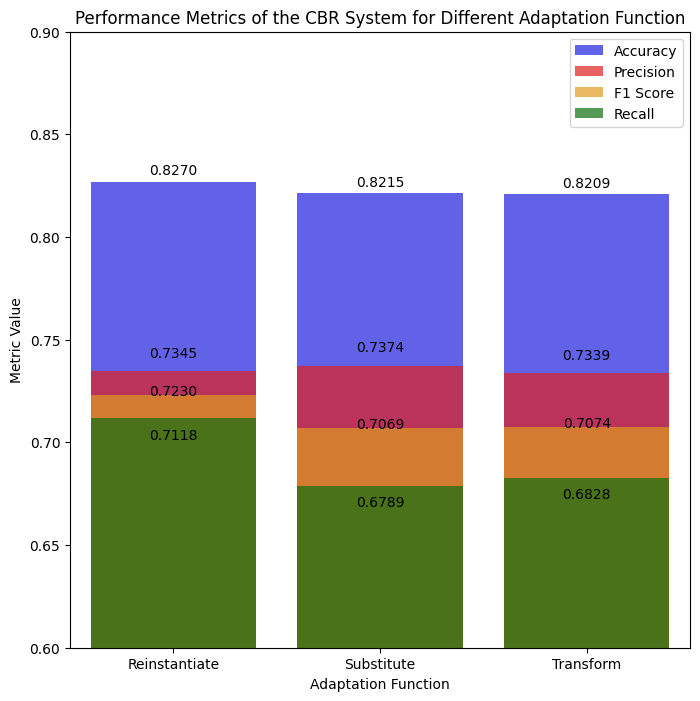

In [99]:
plot_report_of_functions(adaptation_function_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      1113
         1.0       0.73      0.71      0.72       517

    accuracy                           0.83      1630
   macro avg       0.80      0.80      0.80      1630
weighted avg       0.83      0.83      0.83      1630



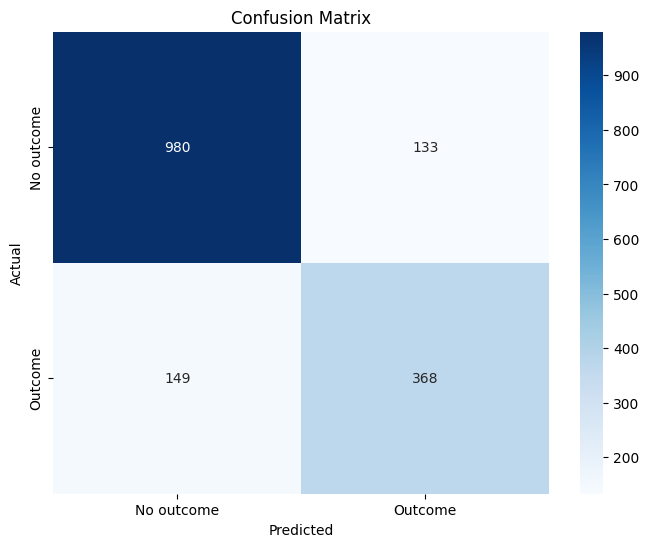

In [103]:
# Evaluate the CBR with the best N value
y_pred = evaluate_cbr(X_train, X_test, y_train, y_test, calculate_hamming_similarity, reuse_majority, reinstantiate, best_n)

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No outcome', 'Outcome'], 
            yticklabels=['No outcome', 'Outcome'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



This analysis highlights the performance of a Case-Based Reasoning (CBR) system for car insurance claim prediction. 

While the overall accuracy sits at a healthy 83%, the data presents a challenge – class imbalance. There are significantly more instances of non-claims (class 0) compared to actual claims (class 1).